# HW3: Vibration of strings with friction


### Preliminary tasks:

Read and understand section 21.2 and 21.3 of the book and then finish tutorial 10 (vibration of string without friction) to get ready to start this Homework assignment.

## 1D wave equation with friction

In this homework you will find the solution of 1D wave equation by considering the effect of viscousity of medium. Including the friction effect changes the wave equation to (read section 21.3 for more details):

$$\frac{\partial^2 y(x,t)}{\partial x^2}=\frac{1}{c^2}\frac{\partial^2 y(x,t)}{\partial t^2}-\frac{2\kappa}{\rho}\frac{\partial y(x,t)}{\partial t},$$

$$c=\sqrt{\frac{T}{\rho}}$$ 

where $\rho$ and $T$ are density per unit length and tension $T$ of the string. $\kappa$ is a constant that is proportional to the viscosity of the medium in which the string is vibrating. 

### Tasks:

1. Generalize the algorithm (equations 21.21 and 21.23 of the book) to solve the wave equation with friction. You need to discritize the wave equation to obtain an expression for $y_{i,j+1}$ using the central difference formula for the second derevatives and forward difference for the first derivative (see below). Obtain two expressions one for solving the first time step and another one for solving later time steps.    

$$\frac{\partial^2 y}{\partial t^2} \approx \frac{y_{i,j+1}+y_{i,j-1}-2y_{i,j}}{(\Delta t)^2}$$

$$\frac{\partial^2 y}{\partial x^2} \approx \frac{y_{i+1,j}+y_{i-1,j}-2y_{i,j}}{(\Delta x)^2}$$

$$\frac{\partial y}{\partial t} \approx \frac{y_{i,j+1}-y_{i,j}}{\Delta t}$$

2. Complete the code by adding the expressions you found in the previous step. Run your code with following parameters and check if the wave’s behavior seems physical (damps in time). $$T = 40N$$ $$\rho = 0.01 kg∕m$$  $$\Delta x=0.01$$ $$\Delta t=0.0001$$ $$\kappa =0.1$$ Can this value of $\kappa$ stop the oscillation? 


3. As a check, reverse the sign of $\kappa$ and see if the wave grows in time (which would eventually violate our assumption of small oscillations). Plot the position of the middle point of the spring vs. time for $\kappa=-0.1,0,0.1$. Note: To make a plot  you need to store the position of the middle point in a list every time step


In [1]:
from vpython import *
import numpy as np
scene1=canvas()
x = np.zeros((100), float)
y = np.zeros((100), float)
middlepositionlist=[]
# Set up curve
g = canvas(canvas=scene1, width = 600, height = 300, title = 'Vibrating string')
vibst = curve(vector(x[0],y[0],0), color = color.yellow)
ball1 = sphere(pos = vector(100, 0,0), color = color.red, radius = 2)
ball2 = sphere(pos = vector( - 100, 0,0), color = color.red, radius = 2)
ball1.pos
ball2.pos
vibst.radius = 1.0
                                           
dt = 0.0001; dx = 0.01; T = 40; rho = 0.01
maxtime = 100; kappa =0.1;  #this value of kappa is too small for stop the oscillation in the range of maxtime
D=T/(rho*9.8)   #I define the constant D
c=sqrt(T/rho)

# Initialization
xi = np.zeros((101,3), float)                 
                                                   # initial boundary condition####
                                                      
for i in range(0, 101):     xi[i, 0] = 0.1*sin(i*pi/100);
   
    
for i in range(0, 100):                                      # we use this mapping for better visualization
    x[i] = 2.0*i - 100.0                            
    y[i] = 300.*xi[i, 0]
    vibst.append(vector(x[i],y[i],0))

# Later time steps                  
for i in range(1, 100): 
                                 ###Programming task: Add an expression to solve the wave equation (only the first step)####
    xi[i,1]= (dt*(T/rho)*((xi[i+1,0]-xi[i,0])/dx*(exp((i-50)*dx/D) -exp(-(i-50)*dx/D))/D +(exp((i-50)*dx/D) +exp(-(i-50)*dx/D))* (xi[i+1,0]+xi[i-1,0]-2.0*xi[i,0] )/(pow(dx,2) ) ) -2*kappa*xi[i,0]+2*xi[i,0]/dt )/(2*kappa+(2./dt))
   
    
    
while 1:                               
    rate(50)                                             # Plotting delay
    for i in range(1, 100):              
                            ####Programming task: Add an expression to solve the wave equation (for later time steps)####
        xi[i,2]=(dt*(T/rho)*((xi[ i+1,1]-xi[i,1])/dx*(exp((i-50)*dx/D) - exp(-(i-50)*dx/D))/D + (exp((i-50)*dx/D) + exp(-(i-50)*dx/D)) * (xi[i+1,1]+xi[i-1,1] -2.0*xi[i,1]) /(pow(dx,2) )) -2*kappa*xi[i,1] -(-2*xi[i,1]+xi[i,0]) /dt)/(2*kappa+(1./dt))
        middlepositionlist=middlepositionlist + [xi[50,1]]
      
    vibst.clear()
    for i in range(1, 100):      # Scale for plot 
        x[i] = 2.0*i - 100.0                            
        y[i] = 300.*xi[i, 0]
        vibst.append(vector(x[i],y[i],0))                                                
    for i in range(0, 101):
        xi[i, 0] = xi[i, 1]                #We need to store only three time steps                         
        xi[i, 1] = xi[i, 2]                      
print("Done!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

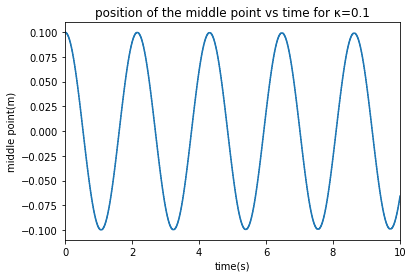

In [3]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0000, (len(middlepositionlist))*0.0001, 0.0001)
s = middlepositionlist
plt.plot(t, s)

plt.xlim(0, 10) 


plt.xlabel('time(s)')
plt.ylabel('middle point(m)')
plt.title('position of the middle point vs time for κ=0.1')
#plt.grid(True)
plt.grid(False)

plt.show()


In [ ]:
'''Q2: kappa =0.1;   is a value too small for stop the oscillation in the range of maxtime(100s),althought,
   In a longest time(more time running the code)the effect of kappa could be appreciated in the graph and the
   oscillation eventually will stop.
   
   for  κ=−0.1 we can see how the wave grows in time and eventually it goes to infinity.
   The reason for that is the violation of our assumption of small oscillations(and eventually the program crushes) 
   For getting the plot the position and the visualization of the string in this case run the following two codes

In [4]:
from vpython import *
import numpy as np
scene1=canvas()
x = np.zeros((100), float)
y = np.zeros((100), float)
middlepositionlistnegative=[]
# Set up curve
g = canvas(canvas=scene1, width = 600, height = 300, title = 'Vibrating string')
vibst = curve(vector(x[0],y[0],0), color = color.yellow)
ball1 = sphere(pos = vector(100, 0,0), color = color.red, radius = 2)
ball2 = sphere(pos = vector( - 100, 0,0), color = color.red, radius = 2)
ball1.pos
ball2.pos
vibst.radius = 1.0
                                           
dt = 0.0001; dx = 0.01; T = 40; rho = 0.01
maxtime = 100; kappa =-1.7; 
D=T/(rho*9.8)   #I define the constant D
c=sqrt(T/rho)

# Initialization
xi = np.zeros((101,3), float)                 
                                                   # initial boundary condition####
                                                      
for i in range(0, 101):     xi[i, 0] = 0.1*sin(i*pi/100);
   
    
for i in range(0, 100):                                      # we use this mapping for better visualization
    x[i] = 2.0*i - 100.0                            
    y[i] = 300.*xi[i, 0]
    vibst.append(vector(x[i],y[i],0))

# Later time steps                  
for i in range(1, 100): 
                                 ###Programming task: Add an expression to solve the wave equation (only the first step)####
    xi[i,1]= (dt*(T/rho)*((xi[i+1,0]-xi[i,0])/dx*(exp((i-50)*dx/D) -exp(-(i-50)*dx/D))/D +(exp((i-50)*dx/D) +exp(-(i-50)*dx/D))* (xi[i+1,0]+xi[i-1,0]-2.0*xi[i,0] )/(pow(dx,2) ) ) -2*kappa*xi[i,0]+2*xi[i,0]/dt )/(2*kappa+(2./dt))
   
    
    
while 1:                               
    rate(50)                                             # Plotting delay
    for i in range(1, 100):              
                            ####Programming task: Add an expression to solve the wave equation (for later time steps)####
        xi[i,2]=(dt*(T/rho)*((xi[ i+1,1]-xi[i,1])/dx*(exp((i-50)*dx/D) - exp(-(i-50)*dx/D))/D + (exp((i-50)*dx/D) + exp(-(i-50)*dx/D)) * (xi[i+1,1]+xi[i-1,1] -2.0*xi[i,1]) /(pow(dx,2) )) -2*kappa*xi[i,1] -(-2*xi[i,1]+xi[i,0]) /dt)/(2*kappa+(1./dt))
        middlepositionlistnegative=middlepositionlistnegative + [xi[50,1]]
      
    vibst.clear()
    for i in range(1, 100):      # Scale for plot 
        x[i] = 2.0*i - 100.0                            
        y[i] = 300.*xi[i, 0]
        vibst.append(vector(x[i],y[i],0))                                                
    for i in range(0, 101):
        xi[i, 0] = xi[i, 1]                #We need to store only three time steps                         
        xi[i, 1] = xi[i, 2]                      
print("Done!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

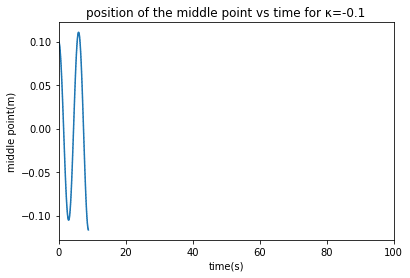

In [5]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0000, len(middlepositionlistnegative)*0.0001, 0.0001)
s = middlepositionlistnegative
plt.plot(t, s)

plt.xlim(0, 100) 


plt.xlabel('time(s)')
plt.ylabel('middle point(m)')
plt.title('position of the middle point vs time for κ=-0.1')
#plt.grid(True)
plt.grid(False)

plt.show()
